In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datas/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(df.quality.unique())

[5 6 7 4 8 3]


In [4]:
# a mapping dictionary that maps the quality values from 0 to 5 quality_mapping
quality_mapping = {
    3 : 0,
    4:1,
    5:2,
    6: 3,
    7 : 4,
    8 : 5,
}

# Apply pandas map function of pandas with 
# any dictionary to convert the values in a given 
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [5]:
df.head(3)
# We can see replaced
df.quality.unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [6]:
print(df.shape)

(1599, 12)


In [7]:
# Before we begin to understand what overfitting is , lets divide the data into two parts

# This dataset has 1599 samples 
# We keep 1000 for training and 599 for testing

# Use sample frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe

df = df.sample(frac = 1).reset_index(drop = True)

# Top 1000 rows are selected for training
# For training 
df_train = df.head(1000)

# bottom 599 for testing
df_test = df.tail(599)

# This can also done through sklearn train test split function

In [8]:
# We will now train a decision tree model on the training set
# I am going to use scikit learn

# Import library
from sklearn import tree
from sklearn import metrics
# initiallize decision tree classifier class
# with a max_depth of 3

clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on 
# these are the features for the model

cols = ['fixed acidity', "volatile acidity", "citric acid", 
       "residual sugar", "chlorides", "free sulfur dioxide", 
        "total sulfur dioxide", "density", "pH", "sulphates",
        "alcohol" ]

In [9]:
# train the model on the provided features
# and mapp

In [10]:
# Training the model
clf.fit(df_train[cols], df_train.quality)


DecisionTreeClassifier(max_depth=3)

#### Accuracy of the model

In [11]:
# Now we test the accuracy of this model on the training set and the test set

# Generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on 
# training data set

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# Calculate the accuracy of prediction on 
# test data set

test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions)

In [12]:
print(train_accuracy, test_accuracy)

0.58 0.5492487479131887


### Low Accuracy so increase max_depth to 7,8, 9 and check the accuracy

# Calculate these accuracies for different values of max_depth and make a plot ?

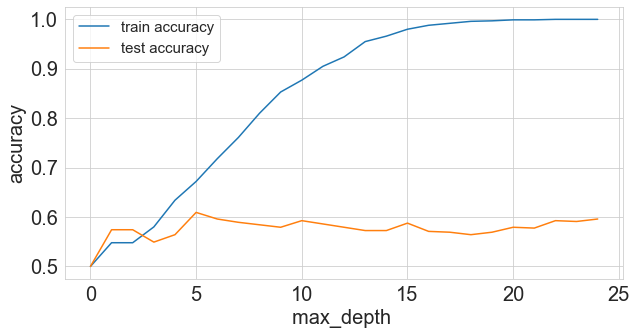

In [25]:
# Importing sklearn tree and metrics
from sklearn import tree
from sklearn import metrics

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# global size of label text
matplotlib.rc("xtick", labelsize =20 )
matplotlib.rc( "ytick", labelsize = 20 )

## initialize lists to store accuracies
# for trainig and test data
# we start with 50 % accuracy
train_accuracies = [0.50 ]
test_accuracies = [0.5]

# iterarte over a few depth values
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    
    # columns featurses for training and testing
    cols = ['fixed acidity', "volatile acidity", "citric acid", 
       "residual sugar", "chlorides", "free sulfur dioxide", 
        "total sulfur dioxide", "density", "pH", "sulphates",
        "alcohol" ]
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    
    # Creating training and testing prediction
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # Calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # Append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# Create two plots using matplots using matplotlib
# and seaborn
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label = "train accuracy")
plt.plot(test_accuracies, label = "test accuracy")
plt.legend(loc = "best", prop = {"size":15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth ", size = 20)
plt.ylabel("accuracy", size = 20)
plt.show()

In [26]:
## We can see train accuracy is increasing as max_depth increasing
# Over Fitting